<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Анализ-спроса-на-авиабилеты" data-toc-modified-id="Анализ-спроса-на-авиабилеты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ спроса на авиабилеты</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Анализ спроса на рейсы авиакомпании

## Описание проекта

Для российской авиакомпании, выполняющей внутренние пассажирские перевозки, нужно изучить предпочтения пользователей, покупающих билеты на разные направления.

Нам предоставлены файлы с результатами запросов:

1. query_1.csv с информацией о типе самолета (model) и количествe рейсов для каждой модели (flights_amount) в сентябре 2018 года.


2. query_3.csv с информацией о городе прилета (city) и среднем количестве рейсов (average_flights), прибывающих в город за день в сентябре 2018 года.


**Цель проекта**

Изучить базу данных и проанализировать спрос пассажиров на рейсы в разрезе городов, а также моделей самолетов.

**Задачи проекта**

1. Импортировать и изучить данные, проверить на наличие пропущенных значений, корректность типов.
2. Построить графики количества совершенных рейсов в зависимости от модели самолёта и принимающих городов, сделать выводы.
3. Выделить топ-10 городов по количеству прибывающих рейсов, построить по нему график, сделать вывод.

## Анализ спроса на авиабилеты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

Загрузим результат первого запроса с информацией о типах самолетов и количеством рейсов для каждой модели в сентябре 2018 года. Выведем основные характеристики таблицы.

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
display(models.head(10))
print(models.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


В таблице нет пропущенных значений, типы данных не меняем.
Сделаем то же самое для второго запроса с данными о полетах по городам.

In [3]:
cities = pd.read_csv('/datasets/query_3.csv')
display(cities.head(10))
print(cities.info())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


Пропущенных значений нет, типы данных корректны. Всего у нас данных по 101 городу.

Для удобства анализа отсортируем города по количеству прилетающих рейсов и округлим до одного значения после запятой.

In [4]:
cities = np.round(cities.sort_values(by='average_flights', ascending=False),1)

Выведем гистограмму с количеством рейсов в зависимости от типа модели.

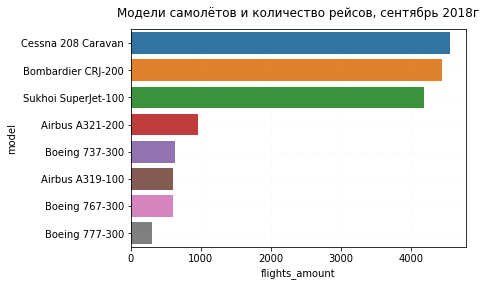

In [5]:
ax = sns.barplot(x='flights_amount', y='model', data=models.sort_values(by='flights_amount', ascending=False), dodge=False)
ax.set(title='Модели самолётов и количество рейсов, сентябрь 2018г')
ax.title.set_position([0.5, 1.03])
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Интересно, что чем меньше самолет, тем чаще он летает. Лидером по количеству полетов стала Сessna 208 Caravan, которая имеет очень скромную вместимость (до 13 пассажиров) и используется на авиалиниях малой протяжённости. Возможно, это бизнес-авиация или рейсы в труднодоступные и малонаселенные места, куда летает мало пассажиров, и нет инфраструктуры для посадки более крупного транспорта (например, в Якутии).

На втором месте Bombardier CRJ200 - региональный самолет вместимостью всего 40-50 пассажиров.
Третий - ближнемагистральный Sukhoi Superjet 100, предназначенный для перевозки от 87 до 108 пассажиров.

Изучим количество полетов по городам назначения. Всего у нас данных по 101 городу. Это довольно большое количество для анализа, тем более, графического. Попробуем вывести график для всех городов и посмотрим, что получится.

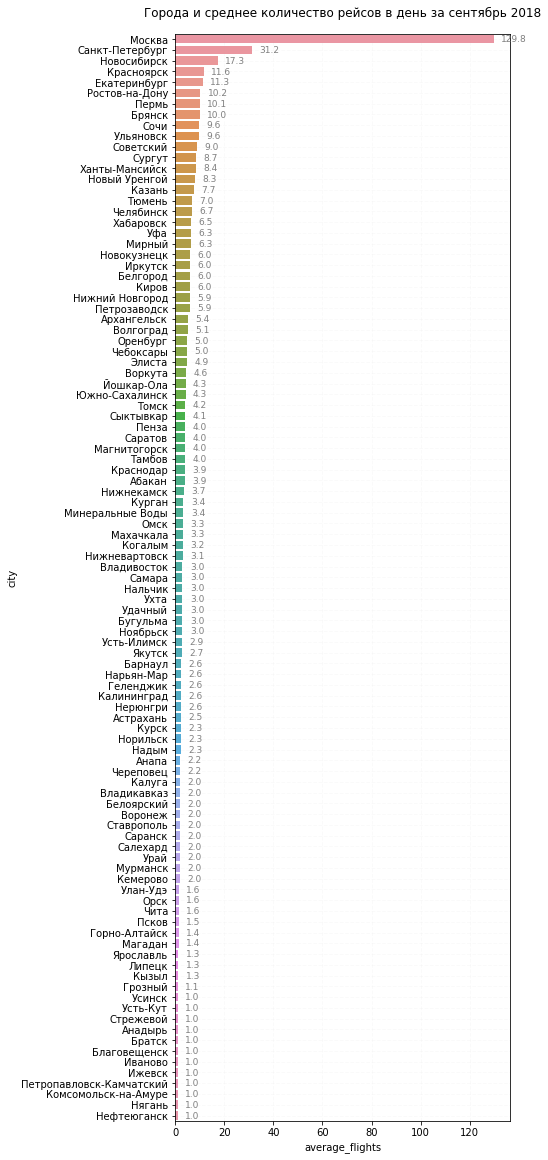

In [6]:
plt.figure(figsize=(6,20))
ax = sns.barplot(x='average_flights', y='city', data=cities)
ax.set(title='Города и среднее количество рейсов в день за сентябрь 2018')
ax.title.set_position([0.5, 1.01])
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

lab_list = cities['average_flights']
for i, v in enumerate(lab_list):
    ax.text(v + 3, i + .25, str(v), color='grey', fontsize=9)
plt.show()

На графике отчетливо виден огромный пик (Москва) и пик поменьше (Санкт-Петербург). Остальные города явно отстают по развитости авиасообщения.
Выберем 10 городов с наибольшим средним количеством рейсов в день (сентябрь, 2018г).

In [7]:
cities_top10 = cities.sort_values(by='average_flights', ascending=False).head(10)
display(cities_top10)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


Уже на этом этапе очевидно, что существует огромный разрыв между столицей и регионами. Получается, что да, все дороги ведут в Москву. По крайней мере, воздушные.

По получившемуся топу построим график.

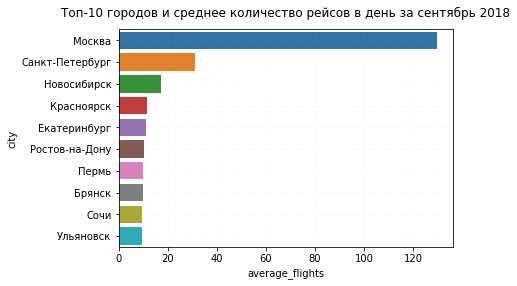

In [8]:
ax = sns.barplot(x='average_flights', y='city', data=cities_top10, dodge=False)
ax.set(title='Топ-10 городов и среднее количество рейсов в день за сентябрь 2018')
ax.title.set_position([0.5, 1.03])
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Посчитаем, сколько вообще рейсов в среднем за день сентября 2018г приняли Москва, Топ-9 столиц регионов и все регионы вместе взятые.

In [9]:
print('Москва:  {:.1f}'.format(cities_top10[cities_top10['city'] == 'Москва']['average_flights'].sum()))
print('Регионы Топ-9:  {:.1f}'.format(cities_top10[cities_top10['city'] != 'Москва']['average_flights'].sum()))
print('Все регионы:  {:.1f}'.format(cities[cities['city'] != 'Москва']['average_flights'].sum()))

Москва:  129.8
Регионы Топ-9:  120.9
Все регионы:  425.2


В Москву, в общей сложности, за один день сентября 2018 года в среднем прилетело больше пассажирских самолетов, чем суммарно во все остальные 9 городов Топа-10. Московские аэропорты сильно загружены, в то время как авиасообщение между другими городами не развито.

Среднее количество рейсов по всем регионам больше, чем летит в столицу. Однако, нужно учесть, что типы самолетов и их вместимость могут быть разными. Это значит, что здесь также следует рассмотреть объем перевозок в зависимости от количества прибывших пассажиров.

## Общий вывод

Анализ предоставленных авиакомпанией данных за сентябрь 2018г выявил, что наибольшее число полетов совершают небольшие самолеты (чаще всего - Сessna 208 Caravan, на втором месте Bombardier CRJ200).
Скорее всего, это бизнес-авиация или рейсы в труднодоступные районы или районы с низкой плотностью населения. Крупные самолеты невыгодно использовать на небольших расстояниях и на малых пассажиропотоках. Для более полной картины интересно проанализировать, откуда и куда летят эти самолеты.

Среди городов назначения по среднему количеству прибывающих рейсов в день лидером предсказуемо оказалась Москва. Следом с очень большим отрывом идут Санкт-Петербург и Новосибирск. С другими городами разница еще более разительна. Такую значительную разницу можно объяснить несколькими причинами.
Первое - малое количество прямых рейсов. Здесь Москва выступает, как огромный хаб и транзитный пункт. Это часто приводит ко всякого рода коллизиям, например, чтобы переместиться из Челябинска в Тюмень, придется совершить огромный крюк и посетить столицу России. Тут пассажир поневоле призадумается, что поездом быстрее и удобнее будет. Второе - недостаток финансов у населения для приобретения дорогостоящих авиабилетов. Третье - малая заселенность людьми многих частей России. 
Для лучшего понимания этой проблемы имеет смысл изучить также (кроме количества рейсов) количество и маршруты пассажиров, которые перемещаются по стране.